# Exploratory Analysis
Before training the forecasting model we perform some exploratory analysis.

In [1]:
import numpy as np
import pandas as pd
import types
from ibm_botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

## Loading cleaned up data

In [2]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='',
    ibm_auth_endpoint="",
    config=Config(signature_version='oauth'),
    endpoint_url='')

body = client_e3.get_object(Bucket='',Key='Global_temperature.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
Global_temperatures= pd.read_csv(body)
Global_temperatures.head()

,Monthly_Uncertainity,Monthly_Temperature,Date
0,5.003,8.952,1750-01-01
1,4.161,7.238,1750-02-01
2,2.682,8.382,1750-03-01
3,1.966,9.352,1750-04-01
4,2.953,7.931,1750-05-01


## Visualising time series 

In [3]:
time_ticks=np.arange(0,len(Global_temperatures),322)

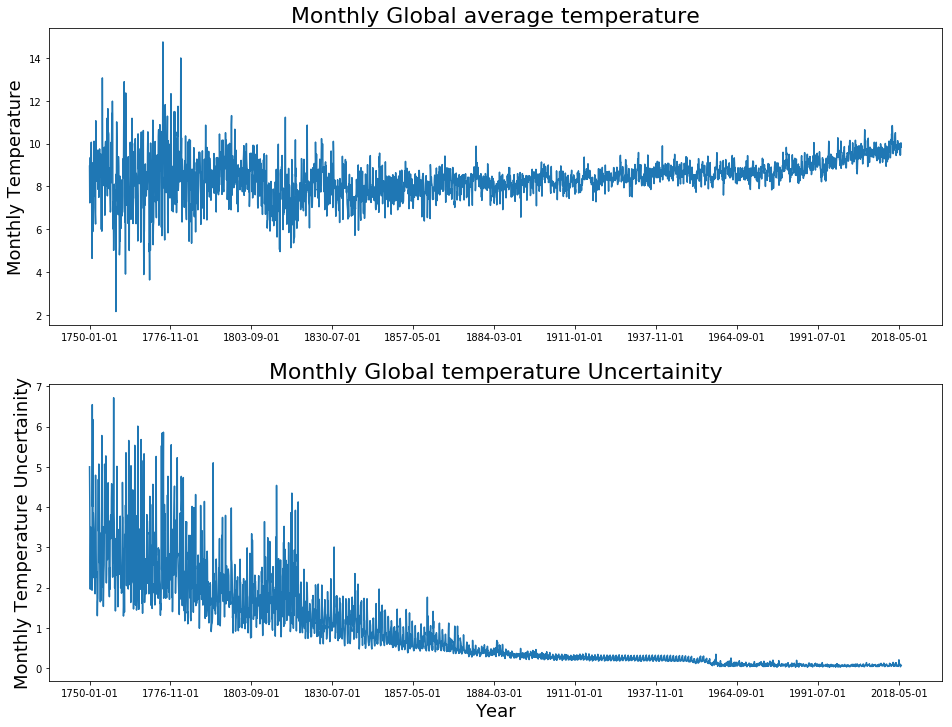

In [4]:
fig, axs=plt.subplots(nrows=2, figsize=(16,12))
plt.subplot(211)
plt.plot(Global_temperatures['Date'],Global_temperatures['Monthly_Temperature'])
plt.title('Monthly Global average temperature',fontsize=22)
plt.ylabel('Monthly Temperature',fontsize=18)
plt.xticks(time_ticks,Global_temperatures.loc[time_ticks,'Date'])
plt.subplot(212)
plt.plot(Global_temperatures['Date'],Global_temperatures['Monthly_Uncertainity'])
plt.title('Monthly Global temperature Uncertainity',fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Monthly Temperature Uncertainity',fontsize=18)
plt.xticks(time_ticks,Global_temperatures.loc[time_ticks,'Date'])
plt.show()

The fluctuations in the data (both average and uncertainity) in the initial time points (before 1900)
are very high compared to the timepoints in recent past, this is understandable as the methods of 
temperature measurement have become more advanced and precise. The main take-away from these plots is that we need to be careful in looking at the history while making predictions. Next we will try to get the standard deviation of data taken for fixed periods.The periods will be years from (X-01-01) to last date (2019-02-01). 

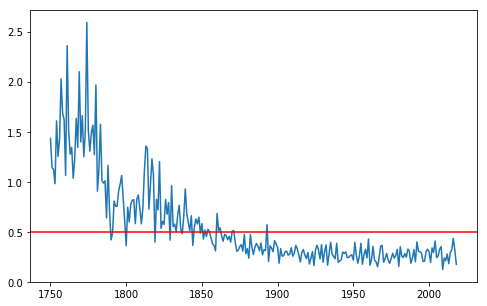

In [5]:
Stdev_Temp=[]
Years=pd.to_datetime(Global_temperatures['Date']).map(lambda x:x.year).unique()
Years=Years[:-1]
for y in Years:
    year_imask=pd.to_datetime(Global_temperatures['Date']).map(lambda x:x.year)==y
    Stdev_Temp.append(np.std(Global_temperatures.Monthly_Temperature[year_imask]))
plt.figure(figsize=(8,5))
plt.plot(Years,Stdev_Temp)
plt.axhline(y=0.5,color='red')

Based on the standard deviation of monthly temperatures over an year, we can see that before the Year 1850 the fluctuations are higher. So, we remove the data from before and only focus on year 1850 and onwards for further analysis.

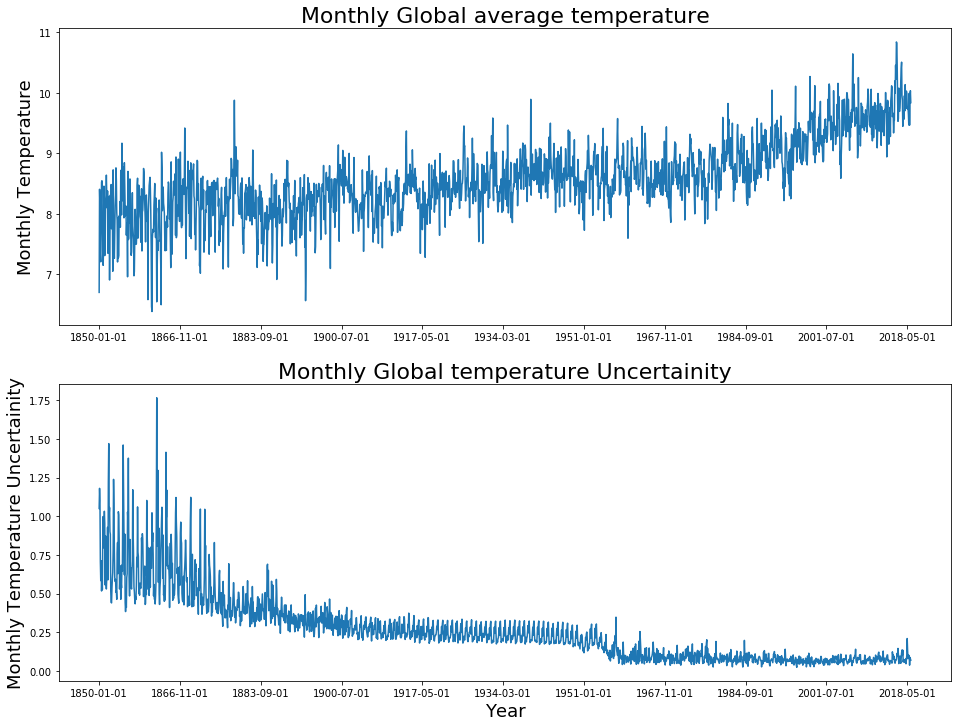

In [6]:
Global_temperatures=Global_temperatures[Global_temperatures.Date>='1850-01-01']
Global_temperatures.reset_index(drop=True,inplace=True)
time_ticks=np.arange(0,len(Global_temperatures),202)
fig, axs=plt.subplots(nrows=2, figsize=(16,12))
plt.subplot(211)
plt.plot(Global_temperatures['Date'],Global_temperatures['Monthly_Temperature'])
plt.title('Monthly Global average temperature',fontsize=22)
plt.ylabel('Monthly Temperature',fontsize=18)
plt.xticks(time_ticks,Global_temperatures.loc[time_ticks,'Date'])
plt.subplot(212)
plt.plot(Global_temperatures['Date'],Global_temperatures['Monthly_Uncertainity'])
plt.title('Monthly Global temperature Uncertainity',fontsize=22)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Monthly Temperature Uncertainity',fontsize=18)
plt.xticks(time_ticks,Global_temperatures.loc[time_ticks,'Date'])
plt.show()

### Distribution of datapoints
We create the distribution of datapoints for 'Monthly_Temperature' and 'Monthly_Uncertainity'.

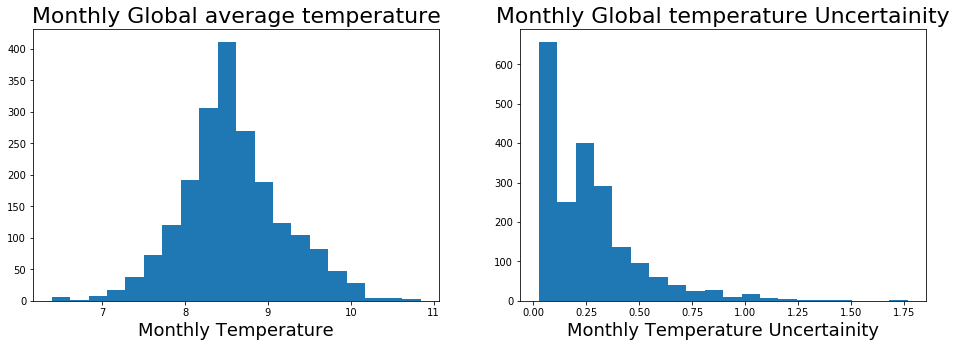

In [7]:
fig, axs=plt.subplots(nrows=2, figsize=(16,5))
plt.subplot(121)
plt.hist(Global_temperatures['Monthly_Temperature'],bins=20)
plt.title('Monthly Global average temperature',fontsize=22)
plt.xlabel('Monthly Temperature',fontsize=18)
plt.subplot(122)
plt.hist(Global_temperatures['Monthly_Uncertainity'],bins=20)
plt.title('Monthly Global temperature Uncertainity',fontsize=22)
plt.xlabel('Monthly Temperature Uncertainity',fontsize=18)
plt.show()

In [8]:
Global_temperatures.to_csv('Global_temperature_final.csv',index=False)
credentials_1 = {
    'IBM_API_KEY_ID': 'gDuuEsxejNgS2P5sbwHGg6FyHUBCRw5mlIBI5WVss8UH',
    'IAM_SERVICE_ID': 'iam-ServiceId-d260bb89-fbdd-43e6-84ad-c61db4acb1d5',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'default-donotdelete-pr-alzt5rl1bmbrij',
    'FILE': 'GlobalTemperature.txt'
}
cos = ibm_boto3.client('s3',
                       ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                       config=Config(signature_version='oauth'),
                       endpoint_url=credentials_1['ENDPOINT'])
with open('Global_temperature_final.csv', 'rb') as data:
     cos.upload_fileobj(data,  credentials_1['BUCKET'], 'Global_temperature_final.csv')